In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import importlib
import datetime as dt
import tensorflow as tf

from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import concatenate

from tensorflow.keras import optimizers
from tensorflow.keras import initializers
from datetime import datetime
from sklearn import preprocessing

from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn import preprocessing as prep
from sklearn.metrics import mean_squared_error

from math import sqrt

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
config=tf.ConfigProto(log_device_placement=True)
sess = tf.Session(config=config)
sess.run(c)

array([[22., 28.],
       [49., 64.]], dtype=float32)

In [3]:
date_format="%Y-%m-%d %H:%M:%S"
date_parse = lambda date: dt.datetime.strptime(date, date_format)
dat1 = pd.read_csv("C:/Users/ciara/Downloads/TimerSeries1.csv", index_col="DeliveryPeriod", parse_dates=True, date_parser=date_parse)
dat2 = pd.read_csv("C:/Users/ciara/Downloads/TimerSeries2.csv", index_col="DeliveryPeriod", parse_dates=True, date_parser=date_parse)


dat1 = dat1.drop(["index"], axis=1)
dat2_columns = [f"Wind_{lag}" for lag in range(12,36)] + [f"Demand_{lag}" for lag in range(12,36)]

dat=pd.concat([dat1,dat2[dat2_columns]], axis=1)


In [4]:
Y=dat.iloc[:, 0:1]
X=dat.iloc[:, 0:83]
X_train=X.iloc[0:11923,:]
Y_train=Y.iloc[0:11923,:]
X_test=X.iloc[11923:11946,:]
Y_test=Y.iloc[11923:11946,:]
X_test

,EURPrices,-24,-48,-72,-168,BMImbalancePrice,BM-24,BM-48,BM-72,BM-168,...,Demand_26,Demand_27,Demand_28,Demand_29,Demand_30,Demand_31,Demand_32,Demand_33,Demand_34,Demand_35
DeliveryPeriod,,,,,,,,,,,,,,,,,,,,,
2020-05-11 01:00:00,0.13,21.00,34.00,29.00,25.10,0.00,6.83,36.45,43.33,41.55,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226
2020-05-11 02:00:00,-0.01,18.55,30.06,26.27,24.00,0.00,8.10,39.65,105.53,46.01,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226
2020-05-11 03:00:00,-2.34,14.08,27.82,23.16,20.83,0.00,-103.95,29.73,32.63,49.74,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226
2020-05-11 04:00:00,-0.02,10.89,27.13,23.00,19.75,0.00,-49.26,78.93,30.69,49.17,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226
2020-05-11 05:00:00,0.16,6.54,25.65,25.16,21.75,0.00,29.63,11.91,31.24,48.10,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226
2020-05-11 06:00:00,15.95,6.54,26.44,27.56,18.77,20.76,0.00,12.13,16.26,46.53,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226
2020-05-11 07:00:00,22.08,7.43,27.48,28.69,25.00,43.10,-1.04,11.79,13.92,24.95,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226
2020-05-11 08:00:00,23.42,12.10,37.98,36.00,32.24,17.69,0.00,14.65,12.61,50.25,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226
2020-05-11 09:00:00,23.16,11.69,39.84,37.72,34.06,12.52,4.67,14.24,21.47,70.64,...,4509,4270,4200,4261,4574,4762,4516,4270,4235,4226


In [5]:
rnn_train1=X_train[["-24", "-48","-72","-168"]]
rnn_train2=X_train[["BM-24","BM-48","BM-72","BM-168"]]
rnn_train3=X_train[["WindAggregatedForecast","Wind-48","Wind-72","Wind-168"]]
rnn_train4=X_train[["DemandAggregatedForecast","Demand-24","Demand-48","Demand-72"]]
rnn_test1=X_test[["-24", "-48","-72","-168"]]
rnn_test2=X_test[["BM-24","BM-48","BM-72","BM-168"]]
rnn_test3=X_test[["WindAggregatedForecast","Wind-48","Wind-72","Wind-168"]]
rnn_test4=X_test[["DemandAggregatedForecast","Demand-24","Demand-48","Demand-72"]]
yy_test=Y_test[["EURPrices"]]

In [6]:
scaler1 = preprocessing.MinMaxScaler()
scaler2 = preprocessing.MinMaxScaler()
scaler3 = preprocessing.MinMaxScaler()
scaler4 = preprocessing.MinMaxScaler()
prices_scaler = preprocessing.MinMaxScaler()

In [7]:
rnn_scaled_train1 = scaler1.fit_transform(rnn_train1)
rnn_scaled_train2 = scaler2.fit_transform(rnn_train2)
rnn_scaled_train3 = scaler3.fit_transform(rnn_train3)
rnn_scaled_train4 = scaler4.fit_transform(rnn_train4)
Y_scaled_train = prices_scaler.fit_transform(Y_train)

In [8]:
reshaped = np.hstack(
    (rnn_scaled_train1,rnn_scaled_train2,rnn_scaled_train3,rnn_scaled_train4)
).reshape(rnn_train1.shape[0], 4, 4).transpose(0, 2, 1)

In [9]:
reshaped_test = np.hstack(
    (scaler1.transform(rnn_test1), scaler2.transform(rnn_test2),
     scaler3.transform(rnn_test3), scaler4.transform(rnn_test4))
).reshape(rnn_test1.shape[0], 4, 4).transpose(0, 2, 1)

In [53]:
model1 = Sequential()
model1.add(GRU(4, input_shape=(reshaped.shape[1], reshaped.shape[2])))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
history = model1.fit(reshaped, Y_scaled_train, epochs=50, verbose=1, batch_size=2, validation_split=0.2)


Train on 9538 samples, validate on 2385 samples
Epoch 1/50
9538/9538 [==============================] - 26s 3ms/sample - loss: 0.0030 - val_loss: 9.9695e-04
Epoch 2/50
9538/9538 [==============================] - 22s 2ms/sample - loss: 0.0018 - val_loss: 7.7548e-04
Epoch 3/50
9538/9538 [==============================] - 22s 2ms/sample - loss: 0.0016 - val_loss: 0.0012
Epoch 4/50
9538/9538 [==============================] - 22s 2ms/sample - loss: 0.0015 - val_loss: 7.9759e-04
Epoch 5/50
9538/9538 [==============================] - 22s 2ms/sample - loss: 0.0015 - val_loss: 6.7879e-04
Epoch 6/50
9538/9538 [==============================] - 23s 2ms/sample - loss: 0.0015 - val_loss: 6.4073e-04
Epoch 7/50
9538/9538 [==============================] - 24s 3ms/sample - loss: 0.0014 - val_loss: 6.4047e-04
Epoch 8/50
9538/9538 [==============================] - 24s 2ms/sample - loss: 0.0014 - val_loss: 6.9916e-04
Epoch 9/50
9538/9538 [==============================] - 23s 2ms/sample - loss: 0.001

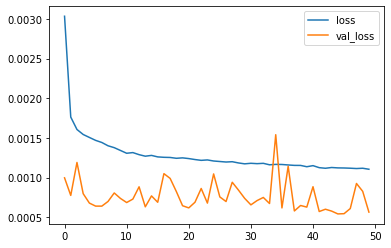

In [54]:
pd.DataFrame(history.history).plot()

In [74]:
model = Sequential()
model.add(LSTM(4, input_shape=(reshaped.shape[1], reshaped.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history2 = model.fit(reshaped, Y_scaled_train, epochs=50, batch_size=2, verbose=1)

Epoch 1/50
11923/11923 [==============================] - 32s 3ms/sample - loss: 0.0039
Epoch 2/50
11923/11923 [==============================] - 38s 3ms/sample - loss: 0.0015
Epoch 3/50
11923/11923 [==============================] - 45s 4ms/sample - loss: 0.0014
Epoch 4/50
11923/11923 [==============================] - 43s 4ms/sample - loss: 0.0014
Epoch 5/50
11923/11923 [==============================] - 43s 4ms/sample - loss: 0.0014
Epoch 6/50
11923/11923 [==============================] - 43s 4ms/sample - loss: 0.0013
Epoch 7/50
11923/11923 [==============================] - 42s 4ms/sample - loss: 0.0013
Epoch 8/50
11923/11923 [==============================] - 45s 4ms/sample - loss: 0.0013
Epoch 9/50
11923/11923 [==============================] - 41s 3ms/sample - loss: 0.0012
Epoch 10/50
11923/11923 [==============================] - 40s 3ms/sample - loss: 0.0012
Epoch 11/50
11923/11923 [==============================] - 43s 4ms/sample - loss: 0.0012
Epoch 12/50
11923/11923 [=====

In [75]:
testpred1 = pd.DataFrame(prices_scaler.inverse_transform(model1.predict(reshaped_test)), columns=["forecast"], index=Y_test.index)
testpred = pd.DataFrame(prices_scaler.inverse_transform(model.predict(reshaped_test)), columns=["forecast"], index=Y_test.index)

forecast_df = pd.DataFrame(dict(GRU=testpred1.values.flatten(), LSTM=testpred.values.flatten(), original=Y_test.values.flatten()), index=Y_test.index)
forecast_df.head()

,GRU,LSTM,original
DeliveryPeriod,,,
2020-05-11 01:00:00,8.910764,1.326160,0.13
2020-05-11 02:00:00,8.689170,1.303952,-0.01
2020-05-11 03:00:00,7.331557,-0.907212,-2.34
2020-05-11 04:00:00,7.809532,0.796207,-0.02
2020-05-11 05:00:00,9.506470,3.847948,0.16


Text(0, 0.5, 'Price in Euro on 11-05-2020')

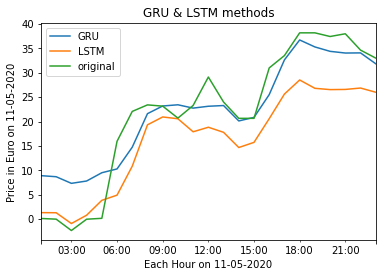

In [76]:
forecast_df.plot()
plt.title('GRU & LSTM methods')
plt.xlabel('Each Hour on 11-05-2020')
plt.ylabel('Price in Euro on 11-05-2020')

In [77]:
mse1 = mean_squared_error(forecast_df["original"], forecast_df["LSTM"])
print(mse1)
mse = mean_squared_error(forecast_df["original"], forecast_df["GRU"])
print(mse)

55.40291167534203
25.923527958262323


In [78]:
rmse1 = sqrt(mean_squared_error(forecast_df["original"], forecast_df["LSTM"]))
print(rmse1)
rmse = sqrt(mean_squared_error(forecast_df["original"], forecast_df["GRU"]))
print(rmse)

7.443313218946387
5.091515290977954


In [79]:
mae_lstm=metrics.mean_absolute_error(forecast_df["LSTM"], forecast_df["original"])
mae_GRU=metrics.mean_absolute_error(forecast_df["GRU"], forecast_df["original"])
print(mae_lstm)
print(mae_GRU)

6.364100641685983
3.8821506956349245


AttributeError: 'History' object has no attribute 'output'